In [17]:
import numpy as np
import matplotlib.pyplot as plt
import wave, struct
from scipy.signal import chirp, spectrogram

In [12]:
t = np.linspace(0,10,10000) #times to evaluate chirp
t1 = 10 #final time
f0 = 1 #start f
f1 = 10 #stop f
signal = chirp(t, f0, t1, f1, method = 'linear') 

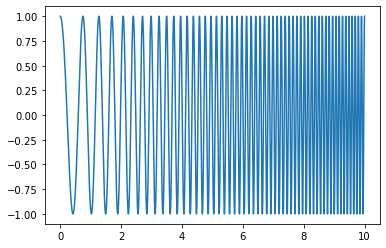

In [14]:
plt.plot(t, signal)
plt.show()

In [25]:
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

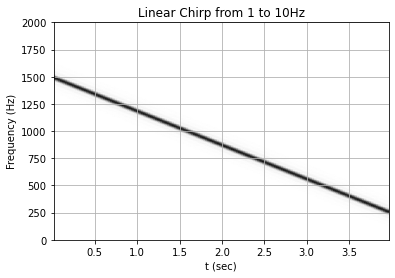

In [22]:
T = 4
fs = 8000
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=1500, f1=250, t1=T, method='linear')
plot_spectrogram('Linear Chirp from 1500 to 250Hz', w, fs)

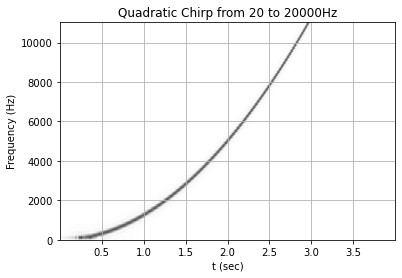

In [40]:
T = 4
fs = 44100
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=20, f1=20000, t1=T, method='quadratic')
plot_spectrogram('Quadratic Chirp from 20 to 20000Hz', w, fs)

In [37]:
from scipy.io.wavfile import write
write('quadratic_20_20k.wav', 44100, w)

In [46]:
w_inv = np.flip(w)

In [47]:
write('quadratic_20_20k_inv.wav', 44100, w_inv)